In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data1 = pd.read_csv('/Users/dinhngoccan/Downloads/UEL/năm 3/cuối kỳ/Case 1 - Employee loyalty/hr_data.csv')
data2 = pd.read_excel('/Users/dinhngoccan/Downloads/UEL/năm 3/cuối kỳ/Case 1 - Employee loyalty/employee_satisfaction_evaluation.xlsx')

#nối 2 file dữ liệu
data = pd.merge(data2, data1, how = "left")

# Data Overview

In [3]:
data.head()

employee_id  satisfaction_level  last_evaluation  number_project  \
0         1003                0.38             0.53               2   
1         1005                0.80             0.86               5   
2         1486                0.11             0.88               7   
3         1038                0.72             0.87               5   
4         1057                0.37             0.52               2   

   average_montly_hours  time_spend_company  Work_accident  left  \
0                   157                   3              0     1   
1                   262                   6              0     1   
2                   272                   4              0     1   
3                   223                   5              0     1   
4                   159                   3              0     1   

   promotion_last_5years department  salary  
0                      0      sales     low  
1                      0      sales  medium  
2                      0      sales  medium  
3                      0      sales     low  
4                      0      sales     low

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   satisfaction_level     14972 non-null  float64
 2   last_evaluation        14972 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   left                   14999 non-null  int64  
 8   promotion_last_5years  14999 non-null  int64  
 9   department             14999 non-null  object 
 10  salary                 14999 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB


In [5]:
data.isnull().sum()

employee_id               0
satisfaction_level       27
last_evaluation          27
number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
dtype: int64

### Xử lý missing values

In [6]:
data.dropna(subset = ["satisfaction_level"], inplace =True)
data.dropna(subset = ["last_evaluation"], inplace =True)

In [7]:
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14956 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14956 non-null  int64  
 1   satisfaction_level     14956 non-null  float64
 2   last_evaluation        14956 non-null  float64
 3   number_project         14956 non-null  int64  
 4   average_montly_hours   14956 non-null  int64  
 5   time_spend_company     14956 non-null  int64  
 6   Work_accident          14956 non-null  int64  
 7   left                   14956 non-null  int64  
 8   promotion_last_5years  14956 non-null  int64  
 9   department             14956 non-null  object 
 10  salary                 14956 non-null  object 
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB


In [8]:
data.drop("employee_id",axis=1,inplace=True)

In [9]:
data.describe()

satisfaction_level  last_evaluation  number_project  \
count        14956.000000     14956.000000    14956.000000   
mean             0.612655         0.715988        3.803290   
std              0.248755         0.171130        1.233091   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14956.000000        14956.000000   14956.000000  14956.000000   
mean             201.053891            3.497860       0.144624      0.237296   
std               49.937412            1.460386       0.351733      0.425439   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14956.000000  
mean                0.021196  
std                 0.144040  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

In [10]:
data.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
department                10
salary                     3
dtype: int64

In [11]:
data.department.nunique
data.department.value_counts()

sales          4130
technical      2709
support        2223
IT             1224
product_mng     899
marketing       856
RandD           786
accounting      766
hr              737
management      626
Name: department, dtype: int64

In [12]:
data.salary.value_counts()

low       7294
medium    6430
high      1232
Name: salary, dtype: int64

In [13]:
data.department.value_counts()

sales          4130
technical      2709
support        2223
IT             1224
product_mng     899
marketing       856
RandD           786
accounting      766
hr              737
management      626
Name: department, dtype: int64

# Exploratory Data Analysis

In [15]:
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

### 1. Left

In [16]:
data.groupby(['left']).mean()

satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666719         0.715385        3.786622   
1               0.438887         0.717926        3.856861   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.072938            3.380468       0.175068   
1               207.420964            3.875176       0.046774   

      promotion_last_5years  
left                         
0                  0.026212  
1                  0.005072

In [17]:
left = px.histogram(x=data["left"], color=data['left'])
left.show()

### 2. Department

In [18]:
data.groupby(['department']).mean()

satisfaction_level  last_evaluation  number_project  \
department                                                         
IT                     0.617794         0.716675        3.816176   
RandD                  0.619822         0.712125        3.852417   
accounting             0.582337         0.718003        3.827676   
hr                     0.598792         0.709077        3.658073   
management             0.621709         0.724233        3.864217   
marketing              0.618166         0.715280        3.689252   
product_mng            0.619944         0.714516        3.808676   
sales                  0.614254         0.709535        3.776271   
support                0.617976         0.722803        3.803869   
technical              0.607542         0.721163        3.876707   

             average_montly_hours  time_spend_company  Work_accident  \
department                                                             
IT                     202.133170            3.468954       0.133987   
RandD                  200.866412            3.368957       0.170483   
accounting             201.232376            3.523499       0.125326   
hr                     198.849389            3.358209       0.120760   
management             201.325879            4.295527       0.164537   
marketing              199.331776            3.571262       0.161215   
product_mng            199.966630            3.476085       0.146830   
sales                  200.887651            3.533414       0.141646   
support                200.728745            3.392263       0.154746   
technical              202.532300            3.411222       0.139535   

                 left  promotion_last_5years  
department                                    
IT           0.221405               0.002451  
RandD        0.153944               0.034351  
accounting   0.265013               0.018277  
hr           0.290366               0.020353  
management   0.142173               0.108626  
marketing    0.237150               0.050234  
product_mng  0.219132               0.000000  
sales        0.243584               0.023971  
support      0.248313               0.008997  
technical    0.255814               0.010336

In [19]:
depa = px.histogram(x=data["department"], color=(data['department']))
depa.show()

In [20]:
pd.crosstab(data.department, data.left)

left            0     1
department             
IT            953   271
RandD         665   121
accounting    563   203
hr            523   214
management    537    89
marketing     653   203
product_mng   702   197
sales        3124  1006
support      1671   552
technical    2016   693

In [21]:
x = data['department']
y = data['left']
colors = data['department']

fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count", y=y, x=x, name="department", marker_color='#FFA160'))
fig.add_trace(go.Histogram(histfunc="sum", y=y, x=x, name="left", marker_color='#626EF6'))

fig.show()

### 3. Salary

In [22]:
data.groupby(['salary']).mean()

satisfaction_level  last_evaluation  number_project  \
salary                                                        
high              0.637313         0.704221        3.769481   
low               0.600643         0.716899        3.800110   
medium            0.621557         0.717210        3.813375   

        average_montly_hours  time_spend_company  Work_accident      left  \
salary                                                                      
high              200.000812            3.693994       0.155844  0.065747   
low               201.022073            3.438031       0.142035  0.295997   
medium            201.291757            3.528149       0.145412  0.203577   

        promotion_last_5years  
salary                         
high                 0.058442  
low                  0.008911  
medium               0.027994

In [23]:
salary = px.histogram(data['salary'], color=(data['salary']))
salary.show()

In [24]:
x = data['salary']
y = data['left']

fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count", y=y, x=x, name="salary", marker_color='#FFA160'))
fig.add_trace(go.Histogram(histfunc="sum", y=y, x=x, name="left", marker_color='#626EF6'))

fig.show()

### 4. Promotion last 5years

In [25]:
pl5y = px.histogram(data['promotion_last_5years'], color=(data['promotion_last_5years']))
pl5y.show()

In [26]:
x = data['promotion_last_5years']
y = data['left']

fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count", y=y, x=x, name="promotion_last_5years", marker_color='#FFA160'))
fig.add_trace(go.Histogram(histfunc="sum", y=y, x=x, name="left", marker_color='#626EF6'))

fig.show()

### 5. Work accident

In [27]:
workacc = px.histogram(data['Work_accident'], color=(data['Work_accident']))
workacc.show()

In [28]:
x = data['Work_accident']
y = data['left']

fig = go.Figure()
fig.add_trace(go.Histogram(histfunc="count", y=y, x=x, name="Work_accident"))
fig.add_trace(go.Histogram(histfunc="sum", y=y, x=x, name="left"))

fig.show()

### 6. Time Spent in the Company Vs Number of Projects

In [29]:
fig = px.density_contour(data, x="time_spend_company", y="number_project", marginal_x="histogram", marginal_y="histogram")
fig.show()

Average Time spent in company :  3.4978603904787375


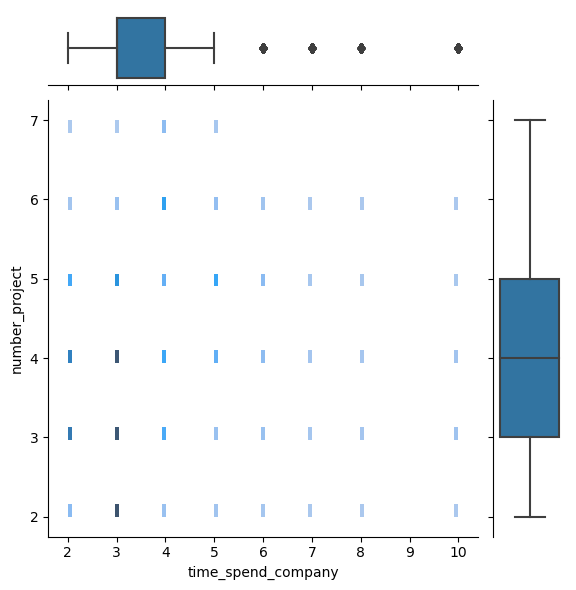

In [30]:
f = sns.JointGrid(data=data, x="time_spend_company", y="number_project")
f.plot_joint(sns.histplot)
f.plot_marginals(sns.boxplot)
print("Average Time spent in company : ",data['time_spend_company'].mean())

### 8. Satisfaction level

In [42]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)

x = np.random.randn(1000)
hist_data = [x]
group_labels = data['satisfaction_level']

fig = ff.create_distplot(group_labels, bin_size=0.05)
fig.show()

TypeError: create_distplot() missing 1 required positional argument: 'group_labels'

In [ ]:
px.box(x=data['satisfaction_level'], y=data['salary'], color=data['salary'])

### 9. Last Evaluation

In [ ]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)

x = np.random.randn(1000)
hist_data = data
group_labels = ['last_evaluation'] 

fig = ff.create_distplot(hist_data, group_labels, bin_size=.05)
fig.show()

In [ ]:
sns.displot(x=data['last_evaluation'],kde=True)

In [ ]:
px.box(x=data['left'], y=data['last_evaluation'], color=data['left'])

### 10. Average Montly Hours Vs Salary

In [ ]:
sns.displot(data['average_montly_hours'], kind = 'kde')

In [ ]:
plt.figure(figsize=(7,7))
sns.stripplot(x='salary',y='average_montly_hours',data=data)

In [ ]:
px.box(x=data['left'], y=data['average_montly_hours'], color=data['left'])

# Model

In [ ]:
data.salary.value_counts()  

In [ ]:
data.department.value_counts()

In [ ]:
salary_dummy = pd.get_dummies(data.salary)
salary_dummy.columns = ['salary_' + str(col) for col in salary_dummy.columns]
department_dummy = pd.get_dummies(data.department)
department_dummy.columns = ['dept_' + str(col) for col in department_dummy.columns]

In [ ]:
data_dummy = pd.concat([data, salary_dummy, department_dummy], axis=1)

In [ ]:
data_dummy.drop(['salary', 'department'], axis=1, inplace=True)
data_dummy.columns

In [ ]:
data_dummy.head()

In [ ]:
data_dummy.shape

### Checking for Outliers

In [ ]:
print(data_dummy.skew())

In [ ]:
data_dummy.info()

In [ ]:
final_data = data_dummy

In [ ]:
final_data.head()

### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(final_data.drop('left', axis=1))

In [ ]:
transformed_data = scaler.transform(final_data.drop('left', axis = 1))

In [ ]:
transformed_data

In [ ]:
processed_data= pd.DataFrame(transformed_data, columns= final_data.columns[:-1])

In [ ]:
processed_data.head()

In [ ]:
processed_data.info()

### Train-Test-Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(processed_data, final_data['left'], test_size= 0.2, random_state = 42)

### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(n_estimators = 100)
RFC.fit(X_train, y_train)
RFC_pred = RFC.predict(X_test)
score = RFC.score(X_test, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(RFC_pred, y_test)))
print(confusion_matrix(y_test, RFC_pred))
print(classification_report(y_test, RFC_pred))

### SVM Model

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
SVC_pred = model.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(SVC_pred, y_test)))
print(classification_report(y_test, SVC_pred))
print(confusion_matrix(y_test, SVC_pred))

### Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dtree= DecisionTreeClassifier()
Dtree.fit(X_train, y_train)
pred = Dtree.predict(X_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(pred, y_test)))
print(classification_report(y_test, pred))
print(confusion_matrix(y_test, pred))